# Chicago Crime Rate Prediction Using Prophet by FB
### Aamir Hussain

- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017. 
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

### About Prophet
- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api

# Imports and Visualization

In [1]:
#conda install -c conda-forge fbprophet
#pip install fbprophet
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
df = pd.concat([df_1, df_2, df_3], ignore_index=False, axis=0)

In [4]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [5]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

In [6]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic ...
# ... Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude 
# ... Longitude Location
df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate',
                 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 
                 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [14]:
df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 8 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Block                 object
 3   Primary Type          object
 4   Description           object
 5   Location Description  object
 6   Arrest                bool  
 7   Domestic              bool  
dtypes: bool(2), int64(1), object(5)
memory usage: 332.9+ MB


In [16]:
# Assembling a datetime by rearranging the dataframe column "Date". 

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [31]:
# setting the index to be the date 
df.index = pd.DatetimeIndex(df.Date)

In [25]:
# Top 15 crimes
df['Primary Type'].value_counts()[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

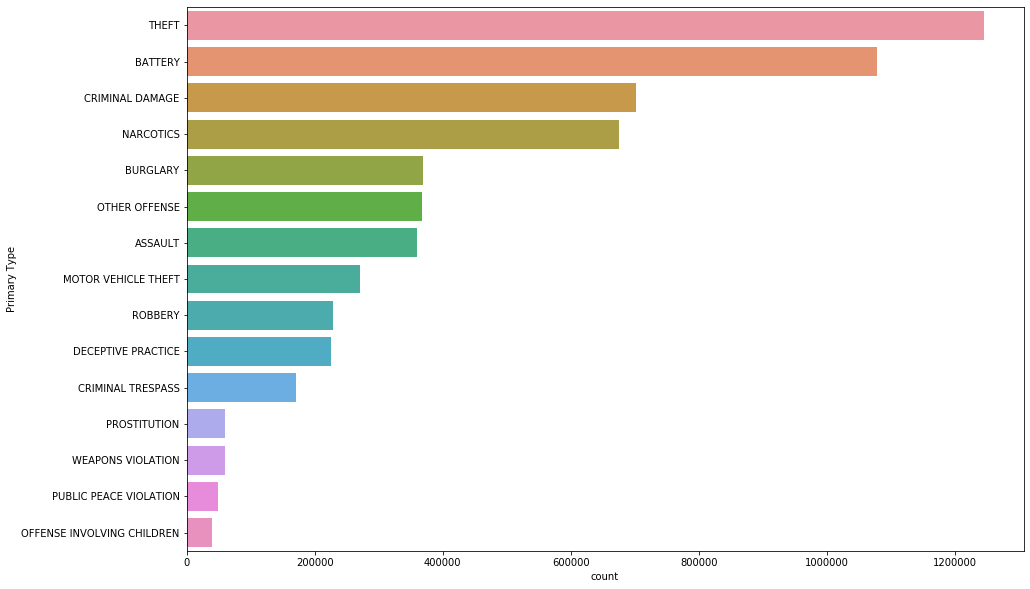

In [26]:
# Visualizing top 15 Crimes.
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type', data=df, order=df['Primary Type'].value_counts()[:15].index)

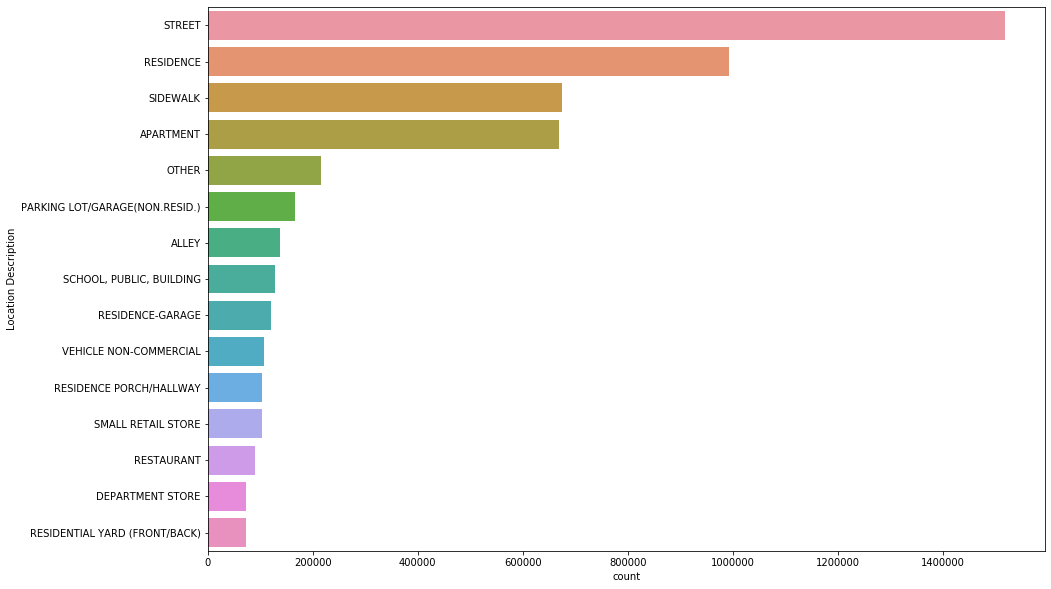

In [28]:
# Visualizing top 15 location of Crimes. 
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description', data=df, 
              order=df['Location Description'].value_counts()[:15].index)

In [33]:
df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

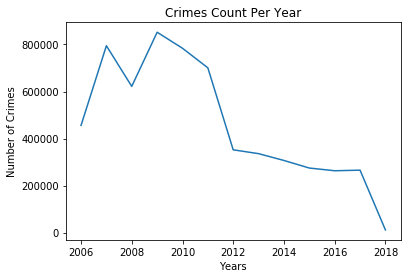

In [36]:
# Yearly Crime rate
plt.plot(df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

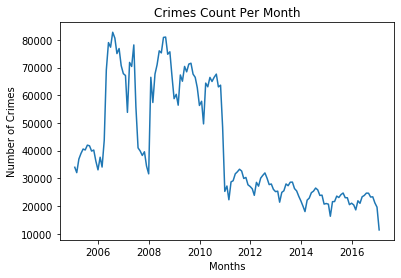

In [37]:
# Monthly Crime rate
plt.plot(df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

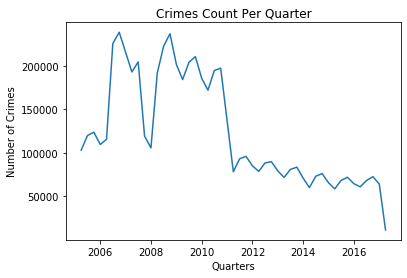

In [39]:
# Crime rate per Quarter
plt.plot(df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# Data Preparation

In [48]:
df_prophet = df.resample('M').size().reset_index()
df_prophet.columns = ['ds', 'y']

In [51]:
df_prophet.head(5)

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572


In [50]:
df_prophet.columns

Index(['ds', 'y'], dtype='object')

# Making Predictions

In [52]:
prophet = Prophet()
prophet.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
#Forcasting into the future
future = prophet.make_future_dataframe(periods=365)
forcast = prophet.predict(future)

In [55]:
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.773642,39188.506764,74473.011001,60454.773642,60454.773642,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,0.0,0.0,0.0,55692.369426
1,2005-02-28,60322.370911,33028.771682,68161.332512,60322.370911,60322.370911,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,0.0,0.0,0.0,50821.854553
2,2005-03-31,60175.782173,42335.777547,75889.974179,60175.782173,60175.782173,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,0.0,0.0,0.0,58951.630221
3,2005-04-30,60033.922104,44548.914931,78580.190664,60033.922104,60033.922104,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,0.0,0.0,0.0,61216.751104
4,2005-05-31,59887.333366,49472.295288,82181.627711,59887.333366,59887.333366,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,0.0,0.0,0.0,65385.581330


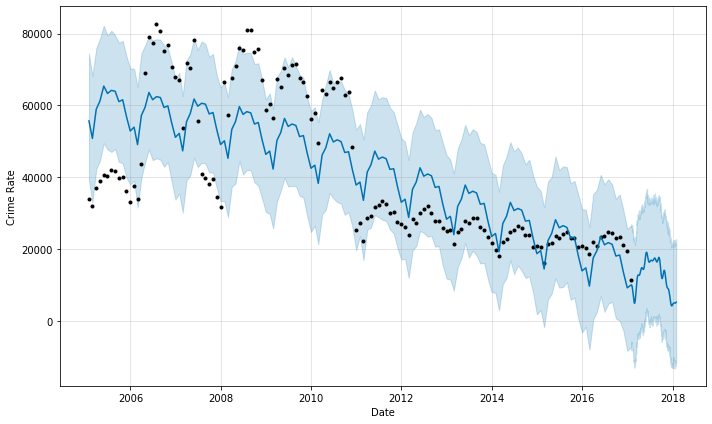

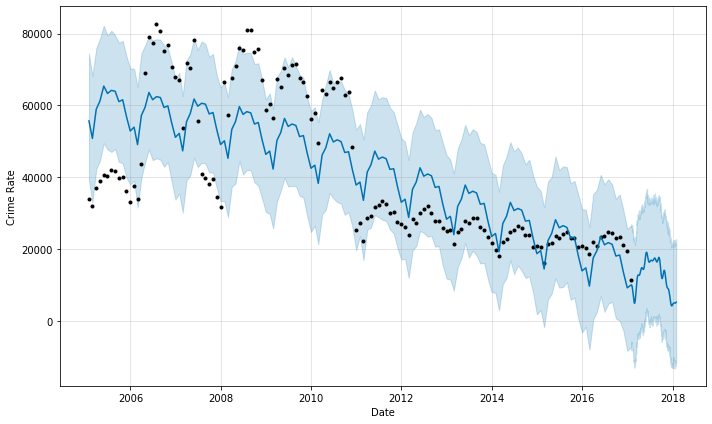

In [56]:
prophet.plot(forcast, xlabel='Date', ylabel='Crime Rate')

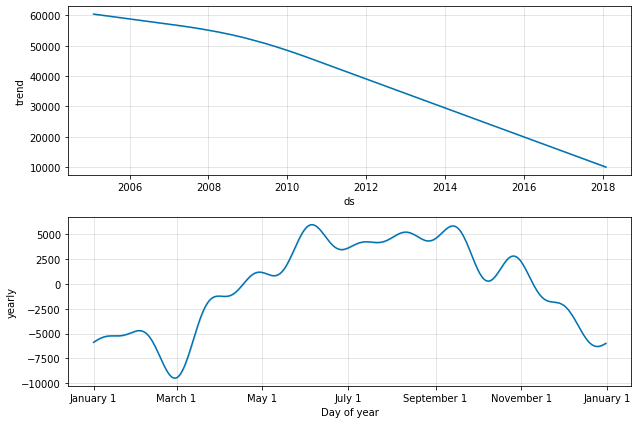

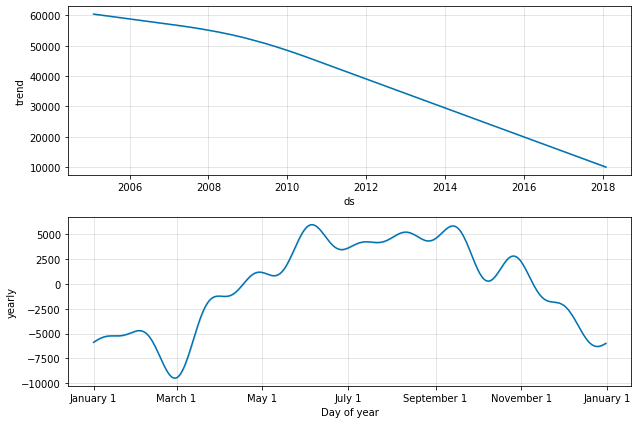

In [57]:
prophet.plot_components(forcast)